# **Arsenic Trend Analysis in Groundwater Wells**
This project uses the **Kendall Tau** to detect trends in arsenic concentration levels in groundwater wells. This type of analysis helps assess environmental conditions over time and determine if contaminants are increasing or decreasing. 

---
## **Project Overview**
This project involved analyzing groundwater contamination data for a client’s tank farm property, which has had historically high contamination levels due to jet fuel spills during the 1990s. The client aimed to demonstrate natural attenuation, (the natural reduction of contamination levels) to reduce regulatory reporting obligations to the Texas Commission on Environmental Quality (TCEQ). Successful demonstration of attenuation would reduce operational costs by lowering the frequency and depth of reporting required. The data consists of arsenic concentrations measured over time from two monitoring wells: **MW-7** and **MW-37**. This analysis is part of a broader environmental monitoring project to ensure groundwater quality and compliance with environmental standards.



**Tools Used:**  
- Python: Data processing and analysis  
- Matplotlib & Seaborn: Data visualization  
- SciPy: Statistical tests  

---
The key objectives are:
1. Apply the **Kendall Tau** to detect trends.
2. Determine if any significant changes in arsenic concentrations are occurring.
3. Visualize the concentration trends for clear presentation.

---

## **1. Import Necessary Libraries**


In [5]:
import numpy as np
from scipy.stats import kendalltau
import seaborn as sns
import matplotlib.pyplot as plt

## **2. Kendall Tau**

In [6]:
# 2. Define a function to perform Kendall Tau test
def kendall_tau_test(data):
    tau, p_value = kendalltau(np.arange(1, len(data) + 1), data)
    return tau, p_value

# 3. Data for MW-7 and MW-37 wells
data_mw_7 = [0.005, 0.005, 0.005, 0.01, 0.02, 0.01, 0.01, 0.0092, 
             0.0122, 0.00627, 0.0036, 0.006, 0.006, 0.0086, 0.0114]

data_mw_37 = [0.0115, 0.0116, 0.0135, 0.014, 0.0152, 0.0059, 
              0.0094, 0.0077, 0.01, 0.0111, 0.0105, 0.0107, 0.0117, 
              0.0088, 0.009, 0.0096, 0.0141]

# 4. Perform the test for both datasets
tau_mw_7, p_value_mw_7 = kendall_tau_test(data_mw_7)
tau_mw_37, p_value_mw_37 = kendall_tau_test(data_mw_37)

# 5. Print the results
print("MW-7 Results: Tau =", tau_mw_7, ", p-value =", p_value_mw_7)
print("MW-37 Results: Tau =", tau_mw_37, ", p-value =", p_value_mw_37)


MW-7 Results: Tau = 0.07886463535341191 , p-value = 0.6891565167793516
MW-37 Results: Tau = -0.08823529411764705 , p-value = 0.6553075802476113


## **3. Interpretation Function**

In [7]:
# 6. Function to interpret results
def interpret_results(tau, p_value):
    if p_value < 0.05:
        print(f"Significant trend detected (Tau={tau:.2f}, p={p_value:.4f})")
    else:
        print(f"No significant trend detected (Tau={tau:.2f}, p={p_value:.4f})")

# 7. Interpret the results for both wells
print("Interpretation for MW-7:")
interpret_results(tau_mw_7, p_value_mw_7)

print("\nInterpretation for MW-37:")
interpret_results(tau_mw_37, p_value_mw_37)


Interpretation for MW-7:
No significant trend detected (Tau=0.08, p=0.6892)

Interpretation for MW-37:
No significant trend detected (Tau=-0.09, p=0.6553)


## 4. Visualization

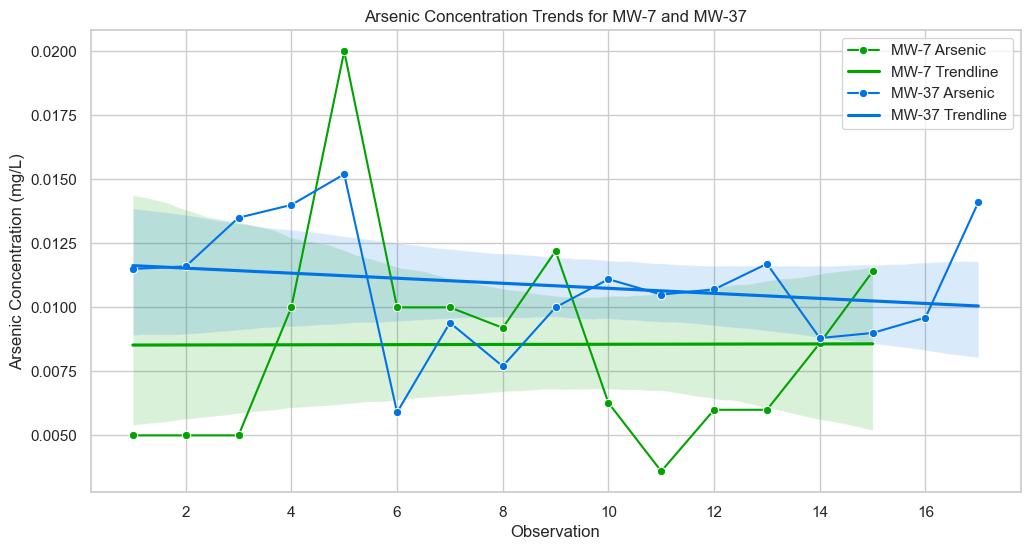

In [8]:
# 8. Visualize the data with trendlines
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot MW-7 Data
sns.lineplot(x=np.arange(1, len(data_mw_7) + 1), y=data_mw_7, 
             marker='o', label='MW-7 Arsenic', color='#00A300')
sns.regplot(x=np.arange(1, len(data_mw_7) + 1), y=data_mw_7, 
            scatter=False, label='MW-7 Trendline', color='#00A300')

# Plot MW-37 Data
sns.lineplot(x=np.arange(1, len(data_mw_37) + 1), y=data_mw_37, 
             marker='o', label='MW-37 Arsenic', color='#0073E6')
sns.regplot(x=np.arange(1, len(data_mw_37) + 1), y=data_mw_37, 
            scatter=False, label='MW-37 Trendline', color='#0073E6')

# Set title and labels
plt.title('Arsenic Concentration Trends for MW-7 and MW-37')
plt.xlabel('Observation')
plt.ylabel('Arsenic Concentration (mg/L)')
plt.legend()
plt.show()


### 5. **Results (Based on Statistical Findings)**

The results of the statistical analysis revealed **no significant trend** in arsenic concentrations for both monitoring wells (MW-7 and MW-37) over the observed period. Using the **Kendall Tau correlation test**, which accounts for non-normal data distributions and outliers, the calculated **tau coefficient** for MW-7 was tau = 0.221 (p = 0.4253), and for MW-37, tau = 0.316 (p = 0.1563). These p-values exceed the 0.05 significance threshold, indicating that the null hypothesis—stating that no increasing or decreasing trend is present—cannot be rejected. 

The findings suggest that **natural attenuation cannot be statistically demonstrated** with the available data, as the concentrations have not decreased consistently over time. As a result, the client will need to **maintain their current reporting and monitoring efforts** to comply with regulatory requirements, and **additional remediation actions** may be required to achieve meaningful reductions in contamination levels in future assessments.

